In this section we want to find the gravitational acceleration of two objects to construct the orbits

$\begin{align}
  r = \sqrt{(x_1-x_2)^2 - (y_1-y_2)^2}
\end{align}$


$\begin{align}
  \ddot x_1 = \frac{G m_2 (x_1 - x_2)}{r^3} 
\end{align}$

$\begin{align}
\ddot y_1 = \frac{G m_2 (y_1 - y_2)}{r^3}
\end{align}$

$\begin{align}
  \ddot x_2 = \frac{G m_1 (x_1 - x_2)}{r^3} 
\end{align}$

$\begin{align}
\ddot y_2 = \frac{G m_1 (y_1 - y_2)}{r^3}
\end{align}$

In [13]:
%matplotlib inline
import numpy as np
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt
from IPython.display import Image

In [14]:
class GravitationalOrbits():
    def __init__(self, m_1=1.,m_2=1., G=1.
                ):

        self.G = G
        self.m_1 = m_1
        self.m_2 = m_2
    def dz_dt(self,t,z):
        """
        [dz/dt d^2z/dt^2]
        
        Parameters
        -------
        t : time
        z: 8- component vector with
                z[0] = x_1(t) and z[1] = x_dot_1(t)
                z[2] = y_1(t) and z[3] = y_dot_1(t)
                z[4] = x_2(t) and z[5] = x_dot_2(t)
                z[6] = y_2(t) and z[7] = y_dot_2(t)
        
        return [volocity, acceleration]
        
        """
        #distance between two object
        r_12 = np.sqrt( (z[0] - z[4])**2 + (z[2] - z[6])**2)
        return[\
              z[1], self.G * self.m_2 * (z[4]-z[0])/r_12**3, \
              z[3], self.G * self.m_2 * (z[6]-z[2])/r_12**3, \
              z[5], -self.G * self.m_1 * (z[4]-z[0])/r_12**3, \
              z[7], -self.G * self.m_1 * (z[6]-z[2])/r_12**3, \
              ]
    def solve_ode(self,t_pts, z_0, abserr=1.0e-10, relerr=1.0e-10):
        solution = solve_ivp(self.dz_dt, (t_pts[0], t_pts[-1]),\
                            z_0,t_eval=t_pts, method='RK23',
                            atol=abserr, rtol=relerr)
        x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2 = solution.y
        return x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2
    def solve_ode_Leapfrog(self, t_pts, z_0):
        pass

In [15]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [16]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [17]:
orbit_labels = (r'$x$', r'$y$')

t_start = 0.
t_end = 50.
delta_t = 0.001

t_pts = np.arange(t_start,t_end+delta_t, delta_t)


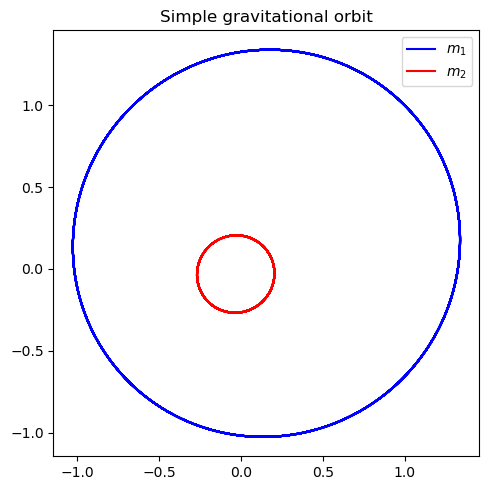

In [18]:
G = 1.
m_1 = 1.
m_2 = 5.

ol = GravitationalOrbits(m_1,m_2,G)
# case for com velocity is zero
x_1_0, x_dot_1_0 = 1. , -1.
y_1_0, y_dot_1_0 = 1. , 1.
x_2_0, x_dot_2_0 = -(m_1 / m_2) * x_1_0, -(m_1/m_2) * x_dot_1_0
y_2_0, y_dot_2_0 = -(m_1 / m_2) * y_1_0, -(m_1/m_2) * y_dot_1_0

z_0 = [x_1_0, x_dot_1_0, y_1_0, y_dot_1_0, \
      x_2_0, x_dot_2_0, y_2_0, y_dot_2_0,]
x_1, x_dot_1, y_1, y_dot_1, x_2 ,x_dot_2, y_2,y_dot_2 = ol.solve_ode(t_pts,z_0)


fig = plt.figure(figsize=(5,5))

ax = fig.add_subplot(1,1,1)

start, stop = start_stop_indices(t_pts,t_start,t_end)
ax.plot(x_1,y_1,color='blue', label = r'$m_1$')
ax.plot(x_2,y_2,color='red', label = r'$m_2$')
ax.set_title('Simple gravitational orbit')
ax.legend()
ax.set_aspect(1)

fig.tight_layout()


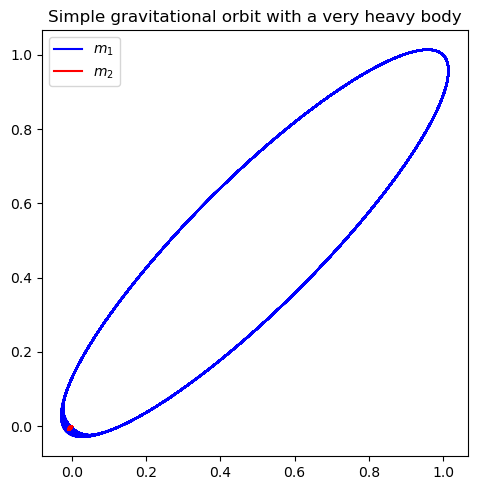

In [19]:
G = 1.0
m_1 = 1.0
m_2 = 100.0

ol = GravitationalOrbits(m_1,m_2,G)
# case for com velocity is zero

x_1_0, x_dot_1_0 = 1. , -1.
y_1_0, y_dot_1_0 = 1. , 1.

x_2_0, x_dot_2_0 = -(m_1 / m_2) * x_1_0, -(m_1/m_2) * x_dot_1_0
y_2_0, y_dot_2_0 = -(m_1 / m_2) * y_1_0, -(m_1/m_2) * y_dot_1_0

z_0 = [x_1_0, x_dot_1_0, y_1_0, y_dot_1_0, \
      x_2_0, x_dot_2_0, y_2_0, y_dot_2_0,]
x_1, x_dot_1, y_1, y_dot_1, x_2 ,x_dot_2, y_2,y_dot_2 = ol.solve_ode(t_pts,z_0)


fig = plt.figure(figsize=(5,5))

ax = fig.add_subplot(1,1,1)

start, stop = start_stop_indices(t_pts,t_start,t_end)
ax.plot(x_1,y_1,color='blue', label = r'$m_1$')
ax.plot(x_2,y_2,color='red', label = r'$m_2$')
ax.set_title('Simple gravitational orbit with a very heavy body')
ax.legend()
ax.set_aspect(1)

fig.tight_layout()

widge

In [20]:
import ipywidgets as widgets
from ipywidgets import HBox, VBox, Layout, Tab, Label, Checkbox
from ipywidgets import FloatSlider, IntSlider, Play, Dropdown, HTMLMath 
from IPython.display import display

In [21]:
def widege_plot(m1=1., m2=1.,G = 1.):
    t_start = 0.
    t_end = 30.
    delta_t = 0.01
    t_pts = np.arange(t_start, t_end+delta_t, delta_t)
    
    # Instantiate orbit object with the new parameters
    o2 = GravitationalOrbits(m_1=m1, m_2=m2, G=G)
    
    #CM frame is at reset
    x_1_0, x_dot_1_0 = 1. , -1.
    y_1_0, y_dot_1_0 = 1. , 1.
    x_2_0, x_dot_2_0 = -(m1 / m2) * x_1_0, -(m1/m2) * x_dot_1_0
    y_2_0, y_dot_2_0 = -(m1 / m2) * y_1_0, -(m1/m2) * y_dot_1_0

    z_0 = [x_1_0, x_dot_1_0, y_1_0, y_dot_1_0, \
      x_2_0, x_dot_2_0, y_2_0, y_dot_2_0,]
    
    x_1, x_dot_1, y_1, y_dot_1, x_2 ,x_dot_2, y_2,y_dot_2 = o2.solve_ode(t_pts,z_0)
    
    fig = plt.figure(figsize=(5,5))

    ax = fig.add_subplot(1,1,1)

    start, stop = start_stop_indices(t_pts,t_start,t_end)
    ax.plot(x_1,y_1,color='blue', label = r'$m_1$')
    ax.plot(x_2,y_2,color='red', label = r'$m_2$')
    ax.set_title('Simple gravitational with widge')
    ax.legend()
    ax.set_aspect(1)

    fig.tight_layout()

    

In [22]:
m__1 = FloatSlider(value=1., min=1., max=100., step=1.,
                      description='m1:')
m__2 = FloatSlider(value=5., min=1., max=100., step=1.,
                      description='m2:')
G__ = FloatSlider(value=1., min=1., max=30., step=0.3,
                      description='g:')

plot_out = widgets.interactive_output(widege_plot, dict(m1=m__1, m2=m__2,G=G__))

In [23]:
UI_box = VBox([m__1,m__2,G__,plot_out])
display(UI_box)

In [24]:
from matplotlib import animation, rc
from IPython.display import HTML

In [25]:
t_start = 0.
t_end = 100.
delta_t = 0.05

G = 1.
m1 = 1.
m2 = 25.

oAnimate = GravitationalOrbits(m_1=m1, m_2=m2, G=G)

x_1_0, x_dot_1_0 = 1. , -1.
y_1_0, y_dot_1_0 = 1. , 1.
x_2_0, x_dot_2_0 = -(m_1 / m_2) * x_1_0, -(m_1/m_2) * x_dot_1_0
y_2_0, y_dot_2_0 = -(m_1 / m_2) * y_1_0, -(m_1/m_2) * y_dot_1_0

z_0 = [x_1_0, x_dot_1_0, y_1_0, y_dot_1_0, \
      x_2_0, x_dot_2_0, y_2_0, y_dot_2_0,]
x_1, x_dot_1, y_1, y_dot_1, x_2 ,x_dot_2, y_2,y_dot_2 = oAnimate.solve_ode(t_pts,z_0)

In [26]:
%%capture

x_min = -5.
x_max = 5.
y_min = -5.
y_max = -y_min

fig_anim = plt.figure(figsize=(5, 5), num='Orbit')
ax_anim = fig_anim.add_subplot(1, 1, 1)
ax_anim.set_xlim(x_min, x_max)
ax_anim.set_ylim(y_min, y_max)

pt1_anim, = ax_anim.plot(x_1[0], y_1[0], 'o', markersize=12, color='blue', label=r'$m_1$')
pt2_anim, = ax_anim.plot(x_2[0], y_2[0], 'o', markersize=12, color='red', label=r'$m_2$')

ax_anim.set_aspect(1)
ax_anim.axis('off')
fig_anim.tight_layout()

In [27]:

def animate_orbits(i):
    i_skip = 2 * i

    pt1_anim.set_data(x_1[i_skip], y_1[i_skip])
    pt2_anim.set_data(x_2[i_skip], y_2[i_skip])

    return (pt1_anim, pt2_anim)

frame_interval = 20  # time between frames
frame_number = 1001   # number of frames to include (index of t_pts)
anim = animation.FuncAnimation(fig_anim, 
                               animate_orbits, 
                               init_func=None,
                               frames=frame_number, 
                               interval=frame_interval, 
                               blit=True,
                               repeat=False)

HTML(anim.to_jshtml())

/var/folders/tw/5zmhl8f91_j6lb4g05bznn6c0000gn/T/ipykernel_7485/1748012051.py:4: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  pt1_anim.set_data(x_1[i_skip], y_1[i_skip])
/var/folders/tw/5zmhl8f91_j6lb4g05bznn6c0000gn/T/ipykernel_7485/1748012051.py:5: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  pt2_anim.set_data(x_2[i_skip], y_2[i_skip])
/var/folders/tw/5zmhl8f91_j6lb4g05bznn6c0000gn/T/ipykernel_7485/1748012051.py:4: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  pt1_anim.set_data(x_1[i_skip], y_1[i_skip])
/var/folders/tw/5zmhl8f91_j6lb4g05bznn6c0000gn/T/ipykernel_7485/1748012051.py:5: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases 